# Predicting the amount of win shares that a player could potentially bring to a team

* Previously evaluated NBA generational data
* Curious as to what individual players bring to a team
* Built a library for interacting and visualizing my dataset within jupyter notebook

## But what is a win share?

A win share is a individual player statistic that attempts to divvy up credit for team success to the indifviduals on the team

There are different ways to measure win shares, but our stats have been normalized to never go above the maximum amount of games that can be possibly played (Either negative or positive win shares)

## The data we're using

The dataset we're working with contains over 50+ years of nba data, however it is nowhere near perfect

* Tons of NaN values for earlier and current generations (not so much for current)
* The NBA has drastically changed it's ruleset over the course of it's extistence
* There are lots of outliers (Average career length is 4 years). Superstars play for upwards of 20. 

## Working with the code

Accessing our custom helper functions

In [1]:
import sys
sys.path.append('.')

# Custom regression module located within the same directory as the notebook
from regression import obtain_linear_reg

Just like that, we have our access to our custom helper functions and can start working obtaining data from our linear regression model that we need. Let's get to work

In [2]:
# Grab a standard linear regression with no preprocessing/scaling done
linear_reg = obtain_linear_reg()

As you can see, we now have access directly to a scored linear regression model that has 23 features, a score of .92, and a mean squared error of .96

In [3]:
# We load our player statistics that were used to calculate the model
linear_reg.stats

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,PF,PTS
0,82.0,75.0,2221.0,272.0,585.0,0.465,108.0,249.0,0.434,164.0,...,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,225.0,724.0
1,6.0,0.0,30.0,5.0,10.0,0.500,0.0,0.0,0.000,5.0,...,1.0,0.000,1.0,3.0,4.0,0.0,1.0,1.0,5.0,10.0
2,78.0,78.0,2922.0,579.0,1169.0,0.495,5.0,16.0,0.313,574.0,...,304.0,0.757,192.0,435.0,627.0,160.0,67.0,48.0,231.0,1393.0
3,8.0,0.0,29.0,1.0,6.0,0.167,0.0,1.0,0.000,1.0,...,3.0,0.667,2.0,3.0,5.0,2.0,1.0,1.0,9.0,4.0
4,51.0,3.0,456.0,46.0,116.0,0.397,1.0,6.0,0.167,45.0,...,13.0,0.923,36.0,46.0,82.0,16.0,11.0,5.0,68.0,105.0
5,80.0,80.0,2819.0,464.0,973.0,0.477,145.0,399.0,0.363,319.0,...,253.0,0.913,45.0,208.0,253.0,210.0,64.0,25.0,182.0,1304.0
6,54.0,8.0,889.0,129.0,253.0,0.510,0.0,5.0,0.000,129.0,...,119.0,0.605,52.0,93.0,145.0,72.0,59.0,19.0,109.0,330.0
7,52.0,38.0,1421.0,155.0,446.0,0.348,58.0,168.0,0.345,97.0,...,81.0,0.728,13.0,116.0,129.0,176.0,50.0,10.0,103.0,427.0
8,79.0,0.0,1168.0,152.0,276.0,0.551,0.0,1.0,0.000,152.0,...,123.0,0.545,128.0,218.0,346.0,31.0,24.0,73.0,169.0,371.0
9,76.0,0.0,1695.0,142.0,251.0,0.566,0.0,3.0,0.000,142.0,...,236.0,0.695,147.0,336.0,483.0,33.0,42.0,143.0,171.0,448.0


## How distributed are our win shares?
As mentioned previously, there are lots of outliers within the nba but the amount does not compare to the overall amount of nba players. So what does our distribution of win shares across players look like?

/home/watson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


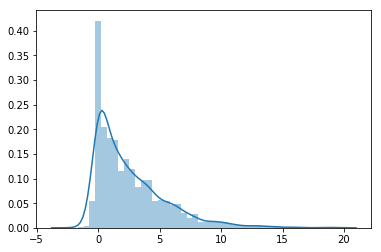

In [4]:
import seaborn as sns
sns.distplot(linear_reg.ws)

As you can tell, we have lot's of players with 0-5 winshares, but not too many from 5-20. This will later be problematic for our model for reasons to be explained

## Are our stats correlated?

How well did we pick our stats? 

Well, let's find out! While there were more stats than listed within our dataframe, I decided to remove all *special* statistics, meaning stats that weren't generated by players themselves but abstract statistics built on the more primitive ones like (Games, Games played, Minutes played, shots taken, FG%, etc)

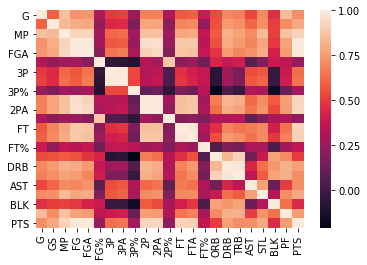

In [5]:
corr = linear_reg.stats.corr()
sns.heatmap(corr)

## What does the average player look like?

The averages for this specific dataframe reflect players from 2010 to 2017, also known as the modern NBA era. I chose this timeframe specifically because the style of play is constantly changing and what could've attributed more win shares to a player in the 90s might not be relevant to today.

In [6]:
output_list = []

# get the mean and max value
for column in linear_reg.stats.columns:
    mean = linear_reg.stats[column].mean()
    max_val = linear_reg.stats[column].max()
    output_list.append((column, mean, max_val))

# Output the results
for data in output_list:
    print(f"{data[0]}\t|\tMean: {data[1]:.2f}\t|\tMax: {data[2]}")

G	|	Mean: 53.05	|	Max: 83.0
GS	|	Mean: 25.43	|	Max: 82.0
MP	|	Mean: 1229.83	|	Max: 3239.0
FG	|	Mean: 191.53	|	Max: 849.0
FGA	|	Mean: 421.58	|	Max: 1941.0
FG%	|	Mean: 0.44	|	Max: 1.0
3P	|	Mean: 38.42	|	Max: 402.0
3PA	|	Mean: 108.12	|	Max: 886.0
3P%	|	Mean: 0.25	|	Max: 1.0
2P	|	Mean: 153.11	|	Max: 734.0
2PA	|	Mean: 313.46	|	Max: 1459.0
2P%	|	Mean: 0.47	|	Max: 1.0
FT	|	Mean: 89.93	|	Max: 756.0
FTA	|	Mean: 118.64	|	Max: 916.0
FT%	|	Mean: 0.70	|	Max: 1.0
ORB	|	Mean: 55.08	|	Max: 440.0
DRB	|	Mean: 161.57	|	Max: 829.0
TRB	|	Mean: 216.66	|	Max: 1226.0
AST	|	Mean: 111.23	|	Max: 906.0
STL	|	Mean: 38.76	|	Max: 191.0
BLK	|	Mean: 24.87	|	Max: 269.0
PF	|	Mean: 103.11	|	Max: 332.0
PTS	|	Mean: 511.42	|	Max: 2593.0


## So... How well does my linear regression perform?

Let's use some testing metrics provided by sklearn to test how well this current model performs

### R2 score (measuring explained variance vs total variance)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = linear_reg.regression.predict(linear_reg.features.testing)
score = r2_score(prediction, linear_reg.target.testing)
score

0.919001863543143

### Mean squared error (measuring the mean squared error of our prediction and actual points)

In [8]:
mean_squared_error(prediction, linear_reg.target.testing)

0.5664219257131702

### Well, our model does pretty well... I think?

In [9]:
testing = linear_reg.target.testing.values
print("Actual\t\t-\t Prediction")
for i in range(len(prediction[:20])):
    print(f"{prediction[i]}\t|\t{testing[i]}")
    print()

Actual		-	 Prediction
[0.21876055]	|	[0.4]

[0.61625179]	|	[0.]

[3.65866817]	|	[4.1]

[2.76496588]	|	[2.]

[6.6372217]	|	[7.8]

[0.0132434]	|	[0.]

[0.29753161]	|	[0.4]

[6.80618876]	|	[6.7]

[12.84485961]	|	[12.]

[0.7244695]	|	[0.]

[2.22099403]	|	[2.5]

[1.25897641]	|	[1.8]

[4.46131236]	|	[4.2]

[12.19059101]	|	[12.2]

[3.12592889]	|	[3.3]

[9.83315528]	|	[8.8]

[-0.03590303]	|	[0.]

[-0.01529839]	|	[0.1]

[0.05078405]	|	[0.]

[2.33213414]	|	[2.1]



## What does our regression look like?
For that, we're going to need to reduce the dimensionality of our dataframe, as wee keep track of 23 different features and we would not be able to visualize that.

Let's...
* Obtain the best model
* Test the model
* Plot the model

In [10]:
# Obtain a model type 4 (plain pca) linear regression
pca_reg = obtain_linear_reg(model_type=4, pca_dimensions=1)

In [11]:
prediction = pca_reg.regression.predict(pca_reg.features.testing)
score = r2_score(prediction, pca_reg.target.testing)
score

0.6403461490197297

In [12]:
mean_squared_error(prediction, pca_reg.target.testing)

2.158654937108315

In [13]:
testing = pca_reg.target.testing.values
print("Actual\t\t-\t Prediction")
for i in range(len(prediction[:20])):
    print(f"{prediction[i]}\t|\t{testing[i]}")
    print()

Actual		-	 Prediction
[0.03556885]	|	[0.4]

[1.04841639]	|	[0.]

[3.93840851]	|	[4.1]

[3.66400003]	|	[2.]

[5.5535187]	|	[7.8]

[-0.64176832]	|	[0.]

[-0.04321633]	|	[0.4]

[5.08040362]	|	[6.7]

[6.15165794]	|	[12.]

[1.2245227]	|	[0.]

[2.03483202]	|	[2.5]

[2.69045744]	|	[1.8]

[3.93418802]	|	[4.2]

[7.64033139]	|	[12.2]

[2.95784026]	|	[3.3]

[8.31816197]	|	[8.8]

[-0.52483717]	|	[0.]

[-0.61423046]	|	[0.1]

[-0.7002316]	|	[0.]

[3.81748871]	|	[2.1]



As you can see, pca doesn't perform that well on this, but we will come back to pcas performance later when we discuss improving our overall models performance

### Visualizing

/home/watson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


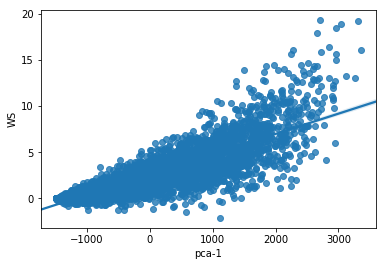

In [14]:
# Plot our 1 dimension reduced pca model vs our 
sns.regplot(x=pca_reg.stats['pca-1'], y=pca_reg.ws['WS'])

## Can we improve scores?
Of course we can. While applying pca is an effective way of reducing the dimensionality of our data and get rid of as much correlated information as possible, you can see that as we start to increase the total number of win shares, the data becomes less linear and a little bit more scattered, with the outliers not being represented that well and in a way, underestimated due to the weight of all the average player based samples.


In [15]:
# Obtain a model type 5 (standard scaled pca) and model type 6 (MinMax scaled pca) linear regressions
standard_pca_reg = obtain_linear_reg(model_type=5, pca_dimensions=1)
mm_pca_reg = obtain_linear_reg(model_type=6, pca_dimensions=1)

### Testing standard scaled model

In [16]:
## Evaluation of standard model
prediction = standard_pca_reg.regression.predict(standard_pca_reg.features.testing)
score = r2_score(prediction, standard_pca_reg.target.testing)
score

0.7162965551220896

In [17]:
mean_squared_error(prediction, standard_pca_reg.target.testing)

1.7696876062378268

/home/watson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


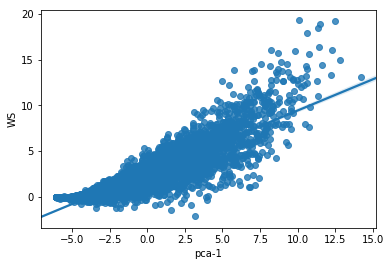

In [18]:
sns.regplot(x=standard_pca_reg.stats['pca-1'], y=standard_pca_reg.ws['WS'])

### Testing our MinMax scaled model

In [19]:
## Evaluation of standard model
prediction = mm_pca_reg.regression.predict(mm_pca_reg.features.testing)
score = r2_score(prediction, mm_pca_reg.target.testing)
score

0.6607641164014089

In [20]:
mean_squared_error(prediction, mm_pca_reg.target.testing)

2.0691521053005295

/home/watson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


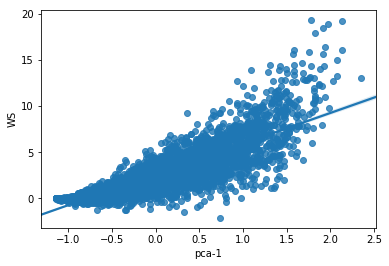

In [21]:
sns.regplot(x=mm_pca_reg.stats['pca-1'], y=pca_reg.ws['WS'])

### Information preservation
At the cost of reducing the dimensionality of our data, we lose information. Luckily, our built in function allows us to specify the minimum amount of information preservation we want but will have to almost certaintly use more than one dimension.

In [22]:
# Find us a dimension that preserves the amount of information we're looking for.
thresholds = [.95, .96, .97, .98, .99]
results = []
for threshold in thresholds:
    model = obtain_linear_reg(model_type=4, pca_dimensions=0, pca_threshold=threshold)
    print(f"To preserve {threshold * 100:.2f}% information, we need: {len(model.stats.columns)} dimensions")

To preserve 95.00% information, we need: 2 dimensions
To preserve 96.00% information, we need: 3 dimensions
To preserve 97.00% information, we need: 3 dimensions
To preserve 98.00% information, we need: 3 dimensions
To preserve 99.00% information, we need: 5 dimensions


### Standard scaling

In [23]:
# Find us a dimension that preserves the amount of information we're looking for. 
thresholds = [.95, .96, .97, .98, .99]
results = []
for threshold in thresholds:
    model = obtain_linear_reg(model_type=5, pca_dimensions=0, pca_threshold=threshold)
    print(f"To preserve {threshold * 100:.2f}% information, we need: {len(model.stats.columns)} dimensions")

To preserve 95.00% information, we need: 9 dimensions
To preserve 96.00% information, we need: 10 dimensions
To preserve 97.00% information, we need: 11 dimensions
To preserve 98.00% information, we need: 12 dimensions
To preserve 99.00% information, we need: 14 dimensions


### MinMax scaling

In [24]:
# Find us a dimension that preserves the amount of information we're looking for.
thresholds = [.95, .96, .97, .98, .99]
results = []
for threshold in thresholds:
    model = obtain_linear_reg(model_type=6, pca_dimensions=0, pca_threshold=threshold)
    print(f"To preserve {threshold * 100:.2f}% information, we need: {len(model.stats.columns)} dimensions")

To preserve 95.00% information, we need: 8 dimensions
To preserve 96.00% information, we need: 9 dimensions
To preserve 97.00% information, we need: 10 dimensions
To preserve 98.00% information, we need: 11 dimensions
To preserve 99.00% information, we need: 13 dimensions


### How well does a two dimensional PCA model perform?

In [25]:
pca_model = obtain_linear_reg(model_type=4, pca_dimensions=2)

In [26]:
## Evaluation of standard model
prediction = pca_model.regression.predict(pca_model.features.testing)
score = r2_score(prediction, pca_model.target.testing)
score

0.6614814124770232

In [27]:
mean_squared_error(prediction, pca_model.target.testing)

2.0634276100484557

### Hmmmm, still not good. How about with standard scaling?

In [28]:
std_pca_model = obtain_linear_reg(model_type=5, pca_dimensions=2)

In [29]:
## Evaluation of standard model
prediction = std_pca_model.regression.predict(std_pca_model.features.testing)
score = r2_score(prediction, std_pca_model.target.testing)
score

0.7153017404192952

In [30]:
mean_squared_error(prediction, std_pca_model.target.testing)

1.766921137202446

### It doesn't seem to be helping
Looking back on the information preservation section, it seems like we cannot reduce to 2-3 dimensions if we're going to try and preserve information. Let's evaluate each model with a minimum of 95% information preservation

### Standard scaled PCA with 95% information preservation

In [31]:
std_pca_model = obtain_linear_reg(model_type=5, pca_dimensions=9)

In [32]:
## Evaluation of standard model
prediction = std_pca_model.regression.predict(std_pca_model.features.testing)
score = r2_score(prediction, std_pca_model.target.testing)
score

0.7672303871933266

In [33]:
mean_squared_error(prediction, std_pca_model.target.testing)

1.4480056429535213

### MinMax scaled PCA with 95% information preservation

In [34]:
mm_pca_model = obtain_linear_reg(model_type=6, pca_dimensions=8)

In [35]:
## Evaluation of standard model
prediction = mm_pca_model.regression.predict(mm_pca_model.features.testing)
score = r2_score(prediction, mm_pca_model.target.testing)
score

0.7238444009548147

In [36]:
mean_squared_error(prediction, mm_pca_model.target.testing)

1.7144971399114575

# Overall conclusions, comments, and future additions

* Building a library around my dataset was really fun
* Extending the library to do a lot more with the dataset + be more flexible
* Plan to utilize other kernels to better assist representation for higher winshare count players
* Targeting other special statistics like value over replacement, OWS, DWS, etc

## Thank you!